### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Import Data

In [2]:
# path = 'https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome'
path = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
df = pd.read_csv(path)
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


### Data Preparation ###

In [3]:
y = df['logS']

In [4]:
x = df.drop('logS', axis=1)

### Data splitting

In [5]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 107 to 792
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             915 non-null    float64
 1   MolWt               915 non-null    float64
 2   NumRotatableBonds   915 non-null    float64
 3   AromaticProportion  915 non-null    float64
dtypes: float64(4)
memory usage: 35.7 KB


In [7]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 822 to 948
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             229 non-null    float64
 1   MolWt               229 non-null    float64
 2   NumRotatableBonds   229 non-null    float64
 3   AromaticProportion  229 non-null    float64
dtypes: float64(4)
memory usage: 8.9 KB


In [8]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 915 entries, 107 to 792
Series name: logS
Non-Null Count  Dtype  
--------------  -----  
915 non-null    float64
dtypes: float64(1)
memory usage: 14.3 KB


In [9]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 229 entries, 822 to 948
Series name: logS
Non-Null Count  Dtype  
--------------  -----  
229 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


### Model Building ### 

#### Linear Regression ####

In [10]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Applying the model to make a prediction ####

In [11]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [12]:
lr.coef_

array([-0.73892858, -0.00644945, -0.00262957, -0.4428987 ])

In [13]:
lr.intercept_

0.22249452399664316

## Gradient Descent Implementation 

### Convert to Numpy Array

In [19]:
x_train_n = x_train.to_numpy(dtype=float)
y_train_n = y_train.to_numpy(dtype=float)
x_test_n = x_test.to_numpy(dtype=float)
y_test_n = y_test.to_numpy(dtype=float)

### Feature Scaling 

In [20]:
def scale_feature(x_train_n, columnIndex):
    feature = x_train_n[:, columnIndex]
    max = feature.max()
    m = feature.size
    
    for i in range(m):
        x_train_n[i, columnIndex] = abs(feature[i] - max)/max
    return x_train_n

In [21]:
scale_feature(x_train_n, 1)

array([[ 3.1428    ,  0.1141565 ,  5.        ,  0.        ],
       [-2.0785    ,  0.15370289,  0.        ,  0.        ],
       [-0.4773    ,  0.18825265,  0.        ,  0.        ],
       ...,
       [ 5.76304   ,  0.30508232,  0.        ,  0.9       ],
       [ 3.8996    ,  0.21234424, 10.        ,  0.        ],
       [ 2.52334   ,  0.37654637,  3.        ,  0.3       ]])

In [24]:
def gradient_descent_without_scikit(y_train_n, w_init, b_init, x_train_n, iterations, a):
     
    m = x_train_n.shape[0]
    dj_db_history = np.zeros(iterations, dtype=float)
    dj_dw_history = np.zeros((iterations, w_init.size), dtype=float)
    j_history = np.zeros(iterations, dtype=float)
    y_pred_history = np.zeros((iterations,m), dtype=float) 
    w = w_init
    b = b_init 
    
    y_pred = compute_y_pred(w, x_train_n, b)  
    for i in range(iterations): 
        dj_db, dj_dw = compute_gradient_1(y_pred, y_train_n, x_train_n)
        j_history[i] = compute_cost(y_pred, y_train_n)
        dj_db_history[i] = dj_db
        dj_dw_history[i] = dj_dw 
        b = b - a * dj_db 
        w = w - a * dj_dw
        y_pred = compute_y_pred(w, x_train_n, b)
        y_pred_history[i,:] = y_pred 
        
    return w, b, dj_dw_history, dj_db_history, j_history, y_pred_history  

In [29]:
def compute_gradient_1(y_pred, y_train_n, x_train_n):
    m=y_pred.size
    n=x_train_n.shape[1]
    dj_dw = np.zeros(x_train_n.shape, dtype=float)
    dj_db = np.zeros(m, dtype=float)
    for i in range(m):
        dj_db[i]=(y_pred[i]-y_train_n[i])
        for j in range(n): 
            dj_dw[i, j] = ((y_pred[i] - y_train_n[i]) * x_train_n[i, j])
    
    w_cost =np.zeros(n, dtype=float)
    for i in range(n):
        w_cost[i]=np.sum(dj_dw[:, i])
        
    w_cost = w_cost / m 
    b_cost = np.sum(dj_db)/m
    return b_cost, w_cost

In [47]:
# def compute_gradient(y_pred, y_train, x_train):
#     
#     #Convert the pandas Dataframes to numpy Arrays to allow for easier manipulation. Indexing not possible in DF.  
# #     y_pred : numpy array
#     y_train_n = y_train.to_numpy(dtype=float)
#     x_train_n = x_train.to_numpy(dtype=float) 
#     
#     m=y_pred.size
#     n=x_train_n.shape[1]
#     dj_dw = np.zeros((x_train.shape), dtype=float)
#     dj_db = np.zeros(m, dtype=float)
#     for i in range(m):
#         dj_db[i]=(y_pred[i]-y_train_n[i])
#         for j in range(n): 
#             dj_dw[i, j] = ((y_pred[i] - y_train_n[i]) * x_train_n[i, j])
#     
#     w_cost =np.zeros(n, dtype=float)
#     for i in range(n):
#         w_cost[i]=np.sum(dj_dw[:, i])
# 
#     w_cost = w_cost / m
#     b_cost = np.sum(dj_db)/m
#     return b_cost, w_cost

In [26]:
def compute_cost(y_pred, y_train_n):
    # y_train_n = y_train.to_numpy(dtype=float)
    m=y_pred.size
    sumArray = np.zeros(m, dtype=float)
    for i in range(m):
        sumArray[i] = (y_pred[i]-y_train_n[i])**2
    cost = np.sum(sumArray)/(2*m)
    return cost

In [27]:
def compute_y_pred(w, x, b): 
    m = x.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = np.dot(w, x[i])+b
    return y_pred

### Calculate Gradient Descent ###

In [56]:
m = x_train_n.shape[0]
n = x_train_n.shape[1]
w = np.zeros(n, dtype=float)
# w = np.array([.55, 6.6, 7.8, 8.0])
b = 0.0
iterations = 800
learning_rate = .0001

w, b, dj_dw_history, dj_db_history, j_history, y_pred_history = gradient_descent_without_scikit(y_train_n, w, b, x_train_n, iterations, learning_rate)

convergence_point = j_history[iterations-1]
gradient_w = dj_dw_history[iterations-1]
gradient_b = dj_db_history[iterations-1]
print(f"the last gradients  are {gradient_w} and {gradient_b}. They should decrease by {learning_rate}")
print(f"lowest cost using gradient descent is {convergence_point}")

expected = compute_cost(y_lr_train_pred, y_train)
print(f"the expected cost using scikit LR is {expected}")

the last gradients  are [3.49540783 0.30818705 0.96043475 0.538062  ] and 0.9966823927251803. They should decrease by 0.0001
lowest cost using gradient descent is 1.5204410845237561
the expected cost using scikit LR is 0.5037681475546845


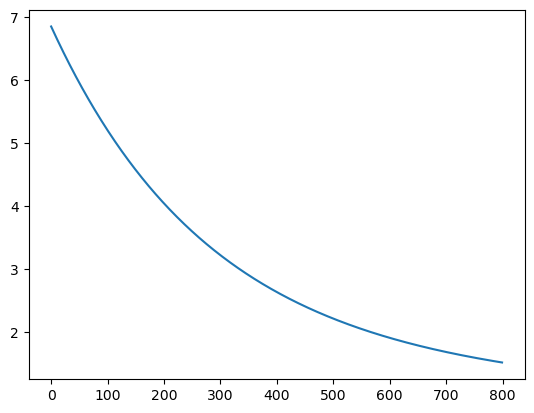

In [57]:
plt.plot(j_history)

In [58]:
w

array([-0.50318282, -0.04291745, -0.2984227 , -0.06659092])

In [59]:
b

-0.1438778380450006

### Finding cost of Sci Kit's LR ###

In [60]:
lr.coef_

array([-0.73892858, -0.00644945, -0.00262957, -0.4428987 ])

In [61]:
lr.intercept_

0.22249452399664316

In [297]:
y_pred_from_lr = compute_y_pred(lr.coef_, x_train_n, lr.intercept_)
compute_cost(y_pred_from_lr, y_train_n)

1.5756702045670699

In [298]:
convergence_point

6.654003498021119

In [299]:
x_train_n

array([[ 3.1428    ,  0.85630816,  5.        ,  0.        ],
       [-2.0785    ,  0.81808031,  0.        ,  0.        ],
       [-0.4773    ,  0.78468248,  0.        ,  0.        ],
       ...,
       [ 5.76304   ,  0.67174809,  0.        ,  0.9       ],
       [ 3.8996    ,  0.76139415, 10.        ,  0.        ],
       [ 2.52334   ,  0.60266676,  3.        ,  0.3       ]])

In [289]:
x_train_n[:,1]

array([112.216, 142.07 , 168.152, 154.125, 100.161, 149.237,  98.189,
       330.171, 223.102, 114.094, 175.   , 271.36 , 309.529, 156.269,
       326.437, 110.181, 282.906, 120.623, 324.336, 217.378, 145.161,
       147.004, 135.191, 258.324,  88.106, 409.782, 144.173, 150.177,
       390.564, 108.144, 323.133,  62.137, 326.437, 152.149, 221.26 ,
       308.381, 239.274, 232.239, 240.215, 240.698,  82.146,  98.189,
       271.39 , 102.177, 346.467,  95.101,  93.513, 416.583, 256.305,
        32.042, 316.427, 393.854,  75.067, 372.808, 408.498, 112.216,
       156.228, 128.215, 226.276, 134.222, 176.215, 132.126, 352.39 ,
       360.45 , 142.201, 429.772, 320.046, 116.204, 340.463, 102.177,
       130.187, 198.31 , 118.176,  90.191, 100.161, 304.67 , 269.772,
       114.06 , 253.367, 169.993, 136.194, 138.126, 284.142, 156.141,
       212.68 , 248.307, 134.65 , 164.375, 380.662, 211.261, 314.522,
       122.167, 163.003,  75.498,  70.135,  86.134, 330.364, 288.44 ,
       254.07 ,  94.

#### Evaluate model performance ####

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred) 

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred) 

In [69]:
print('LR MSE TRAIN: ', lr_train_mse) 
print('LR R2 TRAIN: ', lr_train_r2)
print('LR MSE TEST: ', lr_test_mse)
print('LR R2 TEST: ', lr_test_r2)

LR MSE TRAIN:  1.007536295109369
LR R2 TRAIN:  0.7645051774663391
LR MSE TEST:  1.0206953660861033
LR R2 TEST:  0.7891616188563282


In [70]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forest ##

### Training the Model ###

In [71]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying Model to make a prediction ###

In [72]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate model performance ###

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred) 

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred) 

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


In [74]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Data Visualization of prediction results ##

Text(0.5, 0, 'Experimental LogS')

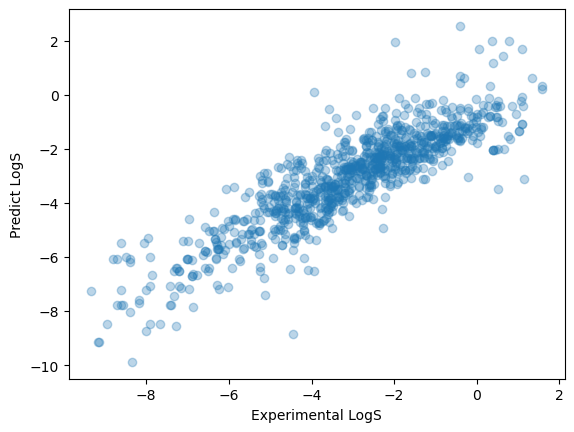

In [75]:
import matplotlib.pyplot as plt

plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot()
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')